# Проектная работа 
# "Работа с гипотезами, A/B - тест и анализ его результатов"

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Относительное изменение кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#Кумулятивная-конверсия-по-группам" data-toc-modified-id="Кумулятивная-конверсия-по-группам-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Кумулятивная конверсия по группам</a></span></li><li><span><a href="#Относительное-изменение-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивной-конверсии-группы-B-к-группе-A-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Относительное изменение кумулятивной конверсии группы B к группе A</a></span></li><li><span><a href="#Количество-заказов-по-пользователям" data-toc-modified-id="Количество-заказов-по-пользователям-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Количество заказов по пользователям</a></span></li><li><span><a href="#Перцентили-количества-заказов-на-пользователя" data-toc-modified-id="Перцентили-количества-заказов-на-пользователя-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Перцентили количества заказов на пользователя</a></span></li><li><span><a href="#Стоимости-заказов" data-toc-modified-id="Стоимости-заказов-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Стоимости заказов</a></span></li><li><span><a href="#Перцентили-стоимости-заказов" data-toc-modified-id="Перцентили-стоимости-заказов-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Перцентили стоимости заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-между-группами-по-«сырым»-данным-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии между группами по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

## Приоритизация гипотез

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
pd.options.display.max_colwidth = 150

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив фреймворки "ICE" и "RICE" для оценки приоритета гипотез, мы получили две таблицы с рейтингами, отсортированными по убыванию. Приоритетность гипотез отличается, так как второй метод оценки включает в себя показатель "Reach" - степень охвата пользователей, которых затронет нововведение. Скидка на товар в день рождения возможно и увеличит продажи, однако контрольная группа для проведения эксперимента будет ничтожно малой, что затруднит проведение А/В-теста. Что касается лидера фреймворка "RICE", то можно сказать, что главной составляющей успеха этой гипотезы является охват всех пользователей интернет-магазина.  

## Анализ A/B-теста

### Предобработка данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.sample(5)
orders.info()

,transactionId,visitorId,date,revenue,group
833,1636454846,4237561104,2019-08-30,590,A
640,3730164576,1476741193,2019-08-04,15485,B
855,3483580157,2580341989,2019-08-27,18270,A
48,133616433,1215602524,2019-08-16,1250,B
1175,1373388206,3717692402,2019-08-14,2400,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.sample(5)
visitors.info()

,date,group,visitors
53,2019-08-23,B,546
16,2019-08-17,A,412
40,2019-08-10,B,369
3,2019-08-04,A,717
27,2019-08-28,A,594


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Данные результатов теста, содержащие информацию о заказах и посетителях прочитаны, осмотрены, формат даты в них исправлен. Другими словами, данные готовы для работы с ними.

### Кумулятивная выручка по группам

In [10]:
# Создадим таблицу, содержащую уникальные даты проведения теста для каждой из групп
datesGroups = orders[['date', 'group']].drop_duplicates()

# Используя полученную таблицу получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# А также агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединим таблицы, переименуем столбцы и добавим новые
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData['avgCheck'] = cumulativeData['revenue'] / cumulativeData['orders']

# Разделим данные по группам
cumulativeDataA = cumulativeData.query('group == "A"')
cumulativeDataB = cumulativeData.query('group == "B"')

cumulativeData.head(5)
cumulativeDataA.head(5)
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294


,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294
6,2019-08-04,A,84,77,425699,2562,0.032787,5067.845238
8,2019-08-05,A,109,100,549917,3318,0.032851,5045.110092


,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
5,2019-08-03,B,61,59,380996,1803,0.033833,6245.836066
7,2019-08-04,B,78,75,489567,2573,0.030315,6276.500000
9,2019-08-05,B,101,98,581995,3280,0.030793,5762.326733


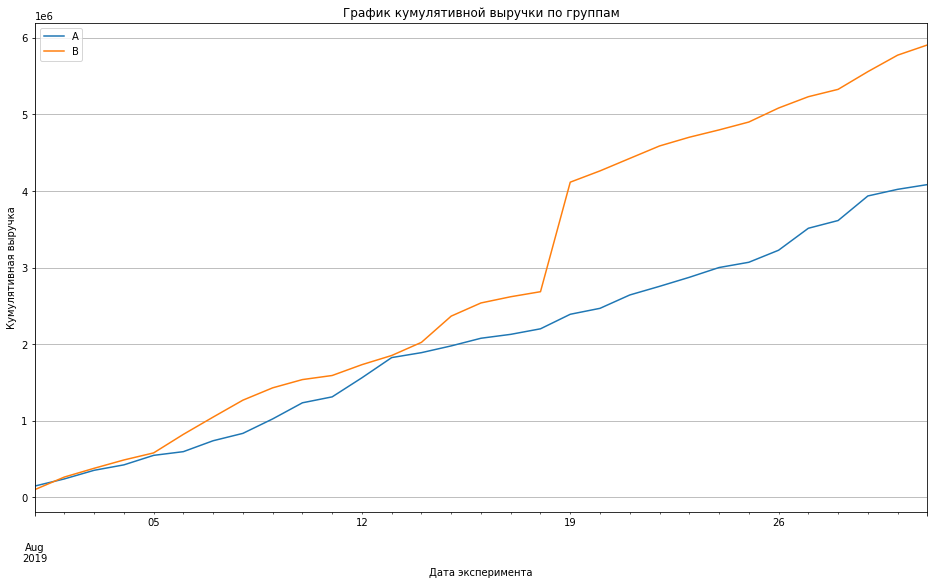

In [11]:
# Построим график кумулятивной выручки по группам
pltA = cumulativeDataA.plot(
    x='date', y='revenue', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='revenue', style='-', label='B', ax=pltA, figsize=(16, 9), grid=True, 
    title='График кумулятивной выручки по группам')
plt.xlabel('Дата эксперимента')
plt.ylabel('Кумулятивная выручка');

Исходя из графика, можно сказать, что до 18 августа кумулятивная сумма выручки у групп была относительно равной, после чего показатели группы В начали значительно превосходить показатели группы А. Анализируя увиденное на графике, можно предположить, что 19.08.19 у покупателей группы В был всплеск покупательской активности или ими была совершена одна или несколько аномально дорогих покупок на общую сумму около 1.5 млн.

### Кумулятивный средний чек по группам

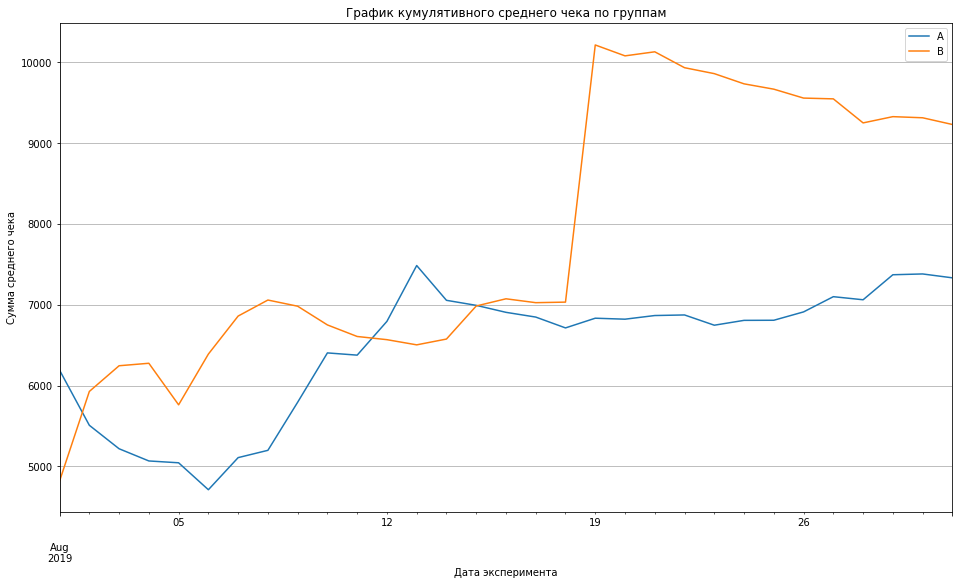

In [12]:
# Построим график кумулятивного среднего чека по группам
pltA = cumulativeDataA.plot(
    x='date', y='avgCheck', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='avgCheck', style='-', label='B', ax=pltA, figsize=(16, 9), grid=True, 
    title='График кумулятивного среднего чека по группам')
plt.xlabel('Дата эксперимента')
plt.ylabel('Сумма среднего чека');

Как и следовало ожидать, средний чек группы В совершает скачок в тот же период времени, что и в графике выручки и к завершению теста превышает средний чек группы А в среднем на 2000.

### Относительное изменение кумулятивного среднего чека группы B к группе A

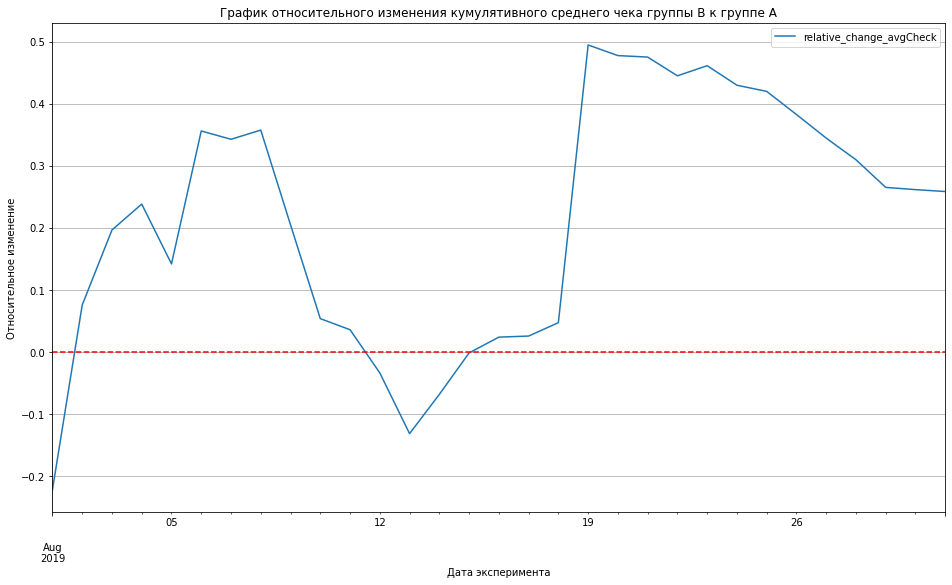

In [13]:
# Объеденним кумулятивные данные групп
mergedAB = cumulativeDataA.merge(cumulativeDataB, on='date', how='left', suffixes=['A', 'B'])

# Посчитаем относительное изменение суммы среднего чека группы В к группе А
mergedAB['relative_change_avgCheck'] = (mergedAB['avgCheckB']/(mergedAB['avgCheckA'])-1)

# Построим график
mergedAB.plot(
    x='date', y='relative_change_avgCheck', style='-', figsize=(16, 9), grid=True, 
    title='График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата эксперимента')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='red', linestyle='--');

На графике видны всплески показателей среднего чека группы В по отношению к показателям группы А, что может говорить о наличии аномальных значений в имеющихся данных.

### Кумулятивная конверсия по группам

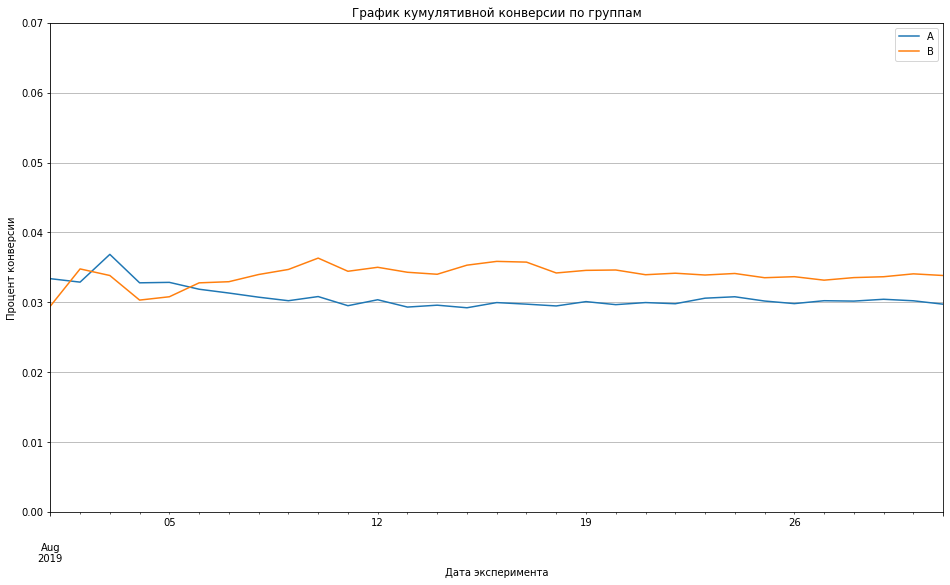

In [14]:
# Построим график кумулятивной конверсии по группам
pltA = cumulativeDataA.plot(
    x='date', y='conversion', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='conversion', style='-', label='B', ax=pltA, figsize=(16, 9), grid=True, 
    title='График кумулятивной конверсии по группам')
plt.ylim(0, 0.07)
plt.xlabel('Дата эксперимента')
plt.ylabel('Процент конверсии');

Приблизительно до 06.08 показатели конверсий групп распределяются пропорционально друг другу, после чего, вплоть до 10.08 конверсия группы В повышается, а группы А идет на спад. После 10.08 показатели групп фиксируются и распределяются на графике паралельно друг к другу.

### Относительное изменение кумулятивной конверсии группы B к группе A

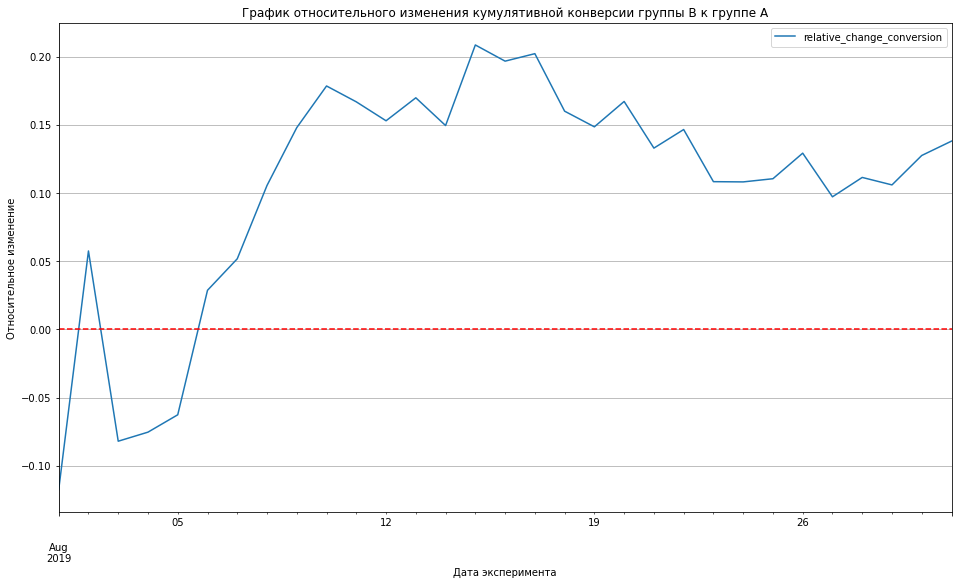

In [15]:
# Посчитаем относительное изменение конверсии группы В к группе А
mergedAB['relative_change_conversion'] = (mergedAB['conversionB']/(mergedAB['conversionA'])-1)

# Построим график
mergedAB.plot(
    x='date', y='relative_change_conversion', style='-', figsize=(16, 9), grid=True, 
    title='График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата эксперимента')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='red', linestyle='--');

Если до 06.08 показатели группы В колебались по отношению к группе А (сперва были выше, затем ниже), то после этой даты они подскачили и зафиксировались на высокой отметке.

### Количество заказов по пользователям

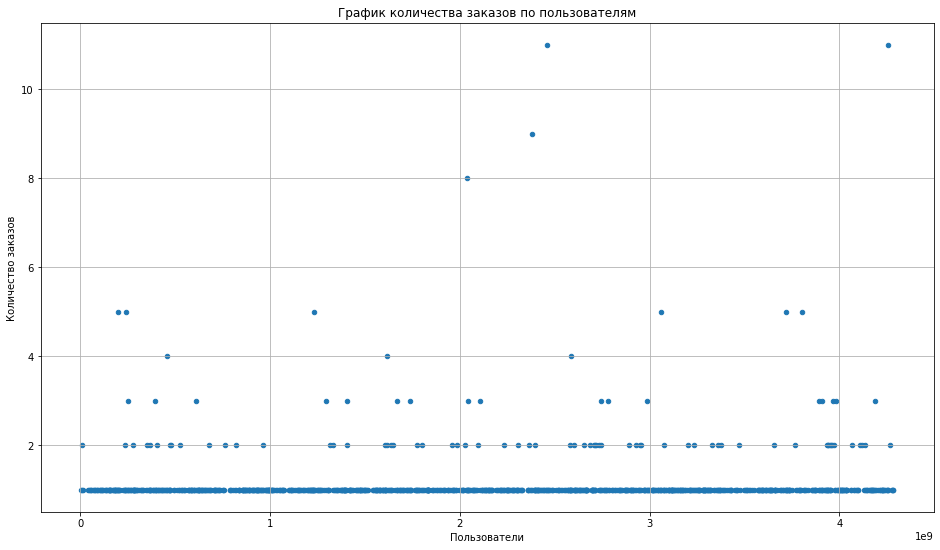

In [16]:
# Сгруппируем данные о заказах, чтобы получить данные о количестве заказов на одного пользователя
number_of_orders = orders.groupby('visitorId').agg({'transactionId' : 'count'}).reset_index()
number_of_orders.columns = ['id', 'orders']

# Построим точечный график
number_of_orders.plot(x='id', y='orders', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(16,9), 
                    title='График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

Клиентов, оформивших более двух заказов можно по пальцам сосчитать. В основном клиенты оформляли один заказ за исследуемый период.

### Перцентили количества заказов на пользователя

In [17]:
orders_percentile = np.percentile(number_of_orders['orders'], [95, 99]) 
print('Всего клиентов совершивших заказы: {}'.format(len(number_of_orders)))
print()
print('95-й перцентиль: {:.0f} заказа'.format(orders_percentile[0]))
print('Клиентов, совершивших более 2-х заказов: {}, что составляет: {:.1%} от общего числа заказов'.format(
    number_of_orders.query('orders > 2')['orders'].count(), (
        number_of_orders.query('orders > 2')['orders'].count() / len(number_of_orders))))
print()
print('99-й перцентиль: {:.0f} заказа'.format(orders_percentile[1]))
print('Клиентов, совершивших более 4-х заказов: {}, что составляет: {:.1%} от общего числа заказов'.format(
    number_of_orders.query('orders > 4')['orders'].count(), (
        number_of_orders.query('orders > 4')['orders'].count() / len(number_of_orders))))

Всего клиентов совершивших заказы: 1031

95-й перцентиль: 2 заказа
Клиентов, совершивших более 2-х заказов: 30, что составляет: 2.9% от общего числа заказов

99-й перцентиль: 4 заказа
Клиентов, совершивших более 4-х заказов: 10, что составляет: 1.0% от общего числа заказов


Исходя из полученных данных, целесообразно выбрать границей для аномальных пользователей 95-й перцентиль, а значит избавиться от данных 30 клиентов, совершивших более 2-х заказов (2.9%).

### Стоимости заказов

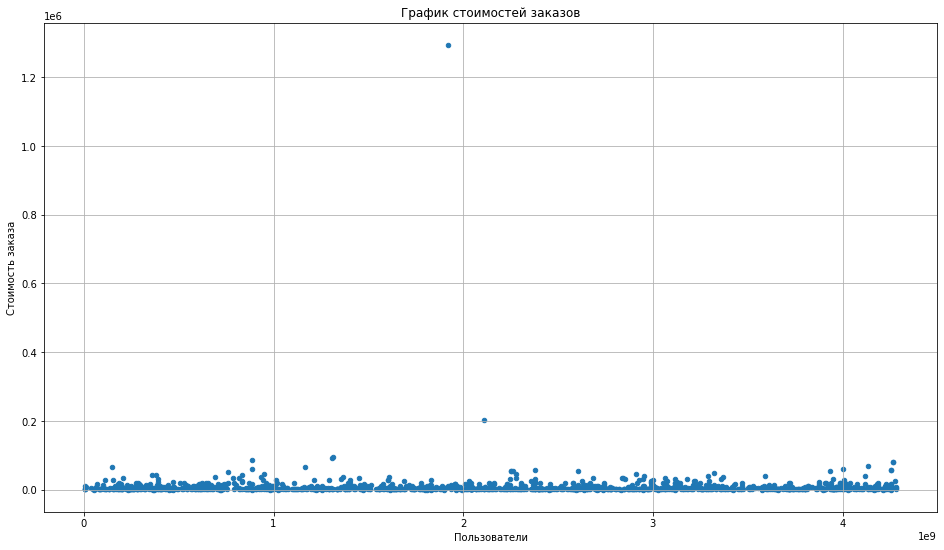

In [18]:
# Построим точечный график
orders.plot(x='visitorId', y='revenue', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(16,9), 
                    title='График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа');

Из-за одной покупки, стоимостью выше 1 млн., график получился не очень информативным. Попробуем снова, установив границу на 100 тыс.

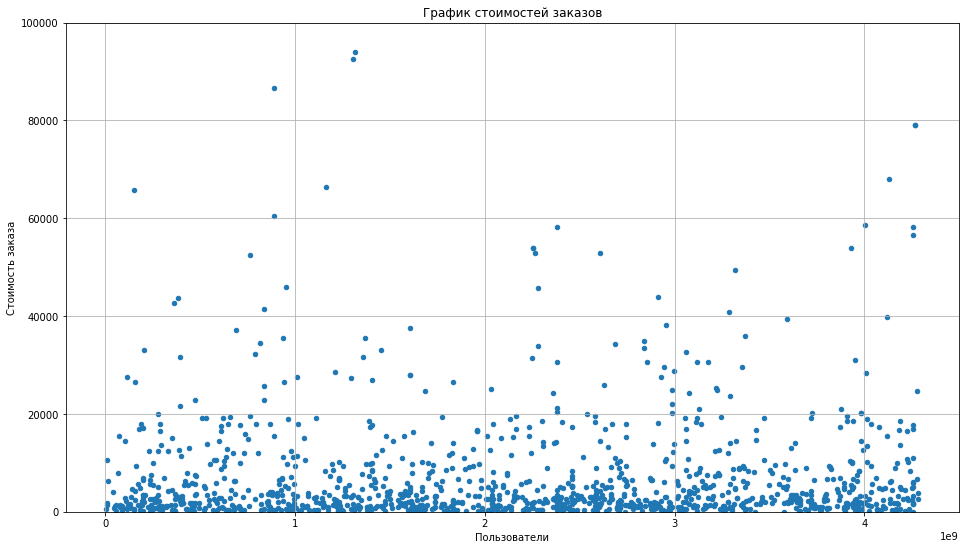

In [19]:
orders.plot(x='visitorId', y='revenue', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(16,9), 
                    title='График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 100000);

Теперь распределение стоимостей видно отчетливее. С уверенностью можно сказать, что подавляющее большинство стоимостей заказов не превышало 20000.

### Перцентили стоимости заказов

In [20]:
price_percentile = np.percentile(orders['revenue'], [95, 99]) 
print('Всего заказов: {}'.format(len(orders)))
print()
print('95-й перцентиль: {:.0f}'.format(price_percentile[0]))
print('Заказов дороже 28000: {}'.format(
    orders.query('revenue > 28000')['revenue'].count()))
print()
print('99-й перцентиль: {:.0f}'.format(price_percentile[1]))
print('Заказов дороже 58233: {}'.format(
    orders.query('revenue > 58233')['revenue'].count()))

Всего заказов: 1197

95-й перцентиль: 28000
Заказов дороже 28000: 60

99-й перцентиль: 58233
Заказов дороже 58233: 12


Всего 60 из 1197 заказов превышают стоимость в 28000. Границей для определения аномальных заказов выберем 95-й перцентиль.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [21]:
# Посчитаем количество заказов на каждого пользователя по группам
ordersByUsersA = orders.query(
    'group == "A"').groupby(
    'visitorId').agg({
    'transactionId': 'count'}).reset_index()
ordersByUsersA.columns = ['id', 'orders']

ordersByUsersB = orders.query(
    'group == "B"').groupby(
    'visitorId').agg({
    'transactionId': 'count'}).reset_index()
ordersByUsersB.columns = ['id', 'orders']

In [22]:
ordersByUsersA['id'].count() + ordersByUsersB['id'].count()

1089

При группировке по пользователям, с разбивкой на группы А и В получилось 1089 пользователей, а как мы могли заметить ранее, при группировке для формирования точечного графика без разъединения на группы, пользователей было 1031.

In [23]:
visitorsB = pd.Series(ordersByUsersB['id'])
ordersByUsersA.query('id in @visitorsB')['id'].count()

58

Проверка на совпадение id в группах показала, что 58 пользователей с одинаковыми id совершали покупки в обеих группах. Данный факт может негативно отразиться на результатах исследования, поэтому сообщим об этом дата-инжинерам, руководству или заказчику. Пока ответ не получен и неизвестно какие действия предпринимать, продолжим проводить исследование с имеющимися данными.

In [24]:
# Создадим таблицы с количеством строк равным количеству всех посетителей и заказов своершенных за это время
sampleA = pd.concat(
    [ordersByUsersA['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsA'].max() - len(ordersByUsersA['orders'])))],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsB'].max() - len(ordersByUsersB['orders'])))],axis=0)

In [25]:
#  Посчитаем статистическую значимость различия конверсий групп, применив тест Манна-Уитни
print('P-value: {:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Разница конверсий групп: {:.3f}'.format(sampleB.mean() / sampleA.mean()-1))

P-value: 0.017
Разница конверсий групп: 0.138


P-value меньше 0.05, в связи с чем, отвергаем нулевую гипотезу. Исходя из анализа "сырых данных" в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

### Статистическая значимость различий в среднем чеке между группами по «сырым» данным

In [26]:
ordersA = orders.query('group == "A"')
ordersB = orders.query('group == "B"')

In [27]:
print('P-value: {:.3f}'.format(stats.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])[1]))
print('Разница среднего чека групп: {:.3f}'.format(ordersB['revenue'].mean() / ordersA['revenue'].mean()-1))

P-value: 0.729
Разница среднего чека групп: 0.259


P-value больше 0.05 — статистически значимых различий в среднем чеке между группами нет. Однако относительное различие среднего чека между группами составляет 25.9%. Крайне подозрительный результат.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [28]:
# Пользователи соврешившие больше 2-х заказов
usersWithManyOrders = pd.concat(
    [ordersByUsersA.query('orders > 2')['id'], ordersByUsersB.query('orders > 2')['id']], axis=0)

# Пользователи соврешившие покупки дороже 28000
usersWithExpensiveOrders = orders.query('revenue > 28000')['visitorId']

# Соеденим полученные данные
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [29]:
# Получим аналогичные таблицы, отфильтрованные от аномальных пользователей
cleared_sampleA = pd.concat(
    [ordersByUsersA.query('id not in @abnormalUsers')['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsA'].max() - len(ordersByUsersA['orders'])))],axis=0)

cleared_sampleB = pd.concat(
    [ordersByUsersB.query('id not in @abnormalUsers')['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsB'].max() - len(ordersByUsersB['orders'])))],axis=0)

In [30]:
#  Посчитаем статистическую значимость различия конверсий групп, применив тест Манна-Уитни
print('P-value: {:.3f}'.format(stats.mannwhitneyu(cleared_sampleA, cleared_sampleB)[1]))
print('Разница конверсий групп: {:.3f}'.format(cleared_sampleB.mean() / cleared_sampleA.mean()-1))

P-value: 0.013
Разница конверсий групп: 0.173


P-value меньше 0.05 - отвергаем нулевую гипотезу. Исходя из анализа "очищенных данных" в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A увеличился по сравнению с предыдущим результатом "сырых данных" и составил 17.3%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [31]:
cleared_ordersA = orders.query('group == "A" and visitorId not in @abnormalUsers')
cleared_ordersB = orders.query('group == "B" and visitorId not in @abnormalUsers')

In [32]:
print('P-value: {:.3f}'.format(stats.mannwhitneyu(cleared_ordersA['revenue'], cleared_ordersB['revenue'])[1]))
print('Разница среднего чека групп: {:.3f}'.format(
    cleared_ordersB['revenue'].mean() / cleared_ordersA['revenue'].mean()-1))

P-value: 0.738
Разница среднего чека групп: -0.020


P-value почти не изменился и остался так же больше 0.05 — статистически значимых различий в среднем чеке между группами по "очищенным данным" нет. Относительное различие средних чеков значительно изменилось - от прироста в 25.9% по "сырым" данным к убытку в 2% по "очищенным". По всей видимости та самая покупка стоимостью выше 1200000 была совершена клиентом из группы В.

## Вывод 

Анализ А/В - теста позволяет нам сделать следующие выводы:
  - С учетом аномалий:
   - в конверсиях групп есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.
   - статистически значимые различия в среднем чеке между группами отсутствуют. Средний покупательский чек группы В выше, чем у группы А на 25.9%.
 
 
  - Без учета аномалий:
   - в конверсиях групп есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A составляет 17.3%.
   - статистически значимые различия в среднем чеке между группами отсутствуют. Средний покупательский чек группы В ниже, чем у группы А на 2%.
   
Основываясь на полученных результатах, учитывая, что при почти одинаковом количестве пользователей, в группе В совершается больше заказов, чем в группе А, можно сказать о позитивном результате проведения теста и увеличении конверсии в группе В. По данным, не отфильтрованным от аномальных покупок, можно так же со всей смелостью заявить о победе группы В, чьи показатели на четверть выше группы А, однако убрав аномально дорогие покупки, выручки групп теряют значительные отличия, а группа В уже проигрывает на 2% в данном показателе.

Для ответа на вопрос о дальнейшей судьбе А/В-теста нам необходимо знать какую гипотезу он проверял и на какие результаты рассчитывал заказчик. Если целью теста было установить увеличение конверсии, то его можно считать успешным, признать победу группы В и завершить. Если же главным ожиданием от теста было увеличение выручки, то необходимо продолжить тест, так как показатели "сырых" и "очищенных" данных сильно разнятся, возможно через какое-то время аномально дорогие покупки, совершенные в группе В, перестанут быть исключением и станут рядовым событием. 